In [ ]:
!pip install statsmodels --user  
!pip install tensorboardX --user
!pip install pandas==0.24.2 --user
!pip install plotly
!pip install bs4 --user
!pip install plotly --user
!pip install -U auquan_toolbox --user

     |████████████████████████████████| 124 kB 5.3 MB/s 
     |████████████████████████████████| 10.1 MB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.24.2 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.24.2 which is incompatible.


     |████████████████████████████████| 103 kB 5.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from zipfile import ZipFile
file_name = "NSE50.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/Pairs-Trading-with-Machine-Learning-main/NseFinalData.csv')

df.head()

,Date,AXISCADES.NS,BAGFILMS.NS,BAJAJ-AUTO.NS,BAJAJCON.NS,BAJAJELEC.NS,BAJAJFINSV.NS,BAJAJHIND.NS,BAJAJHLDNG.NS,BAJFINANCE.NS,BALAJITELE.NS,BALAMINES.NS,BALKRISIND.NS,BALMLAWRIE.NS,BALRAMCHIN.NS,BANARBEADS.NS,BANARISUG.NS,BANCOINDIA.NS,BANG.NS,BANKBARODA.NS,BANKINDIA.NS,BANSWRAS.NS,BASF.NS,BASML.NS,BATAINDIA.NS,BAYERCROP.NS,BBL.NS,BBTC.NS,BEL.NS,BEML.NS,BEPL.NS,BERGEPAINT.NS,BFINVEST.NS,BFUTILITIE.NS,BGRENERGY.NS,BHARATFORG.NS,BHARATGEAR.NS,BHARATRAS.NS,BHEL.NS,BILENERGY.NS,...,APARINDS.NS,APCOTEXIND.NS,APLAPOLLO.NS,APLLTD.NS,APOLLOHOSP.NS,APOLLOTYRE.NS,APTECHT.NS,ARCHIDPLY.NS,ARCHIES.NS,ARIES.NS,ARIHANT.NS,AROGRANITE.NS,ARSSINFRA.NS,ARVIND.NS,ASAHIINDIA.NS,ASAHISONG.NS,ASAL.NS,ASHAPURMIN.NS,ASHIANA.NS,ASHOKA.NS,ASHOKLEY.NS,ASIANHOTNR.NS,ASIANPAINT.NS,ASIANTILES.NS,ASTEC.NS,ASTRAL.NS,ASTRAMICRO.NS,ASTRAZEN.NS,ATFL.NS,ATLANTA.NS,ATUL.NS,ATULAUTO.NS,AURIONPRO.NS,AUROPHARMA.NS,AUSOMENT.NS,AUTOAXLES.NS,AUTOIND.NS,AUTOLITIND.NS,AVTNPL.NS,AXISBANK.NS
0,02-01-2015,180.250000,3.35,2109.889160,348.182739,222.655853,1271.004272,18.950001,1307.439209,317.966248,67.635872,67.698830,283.750244,48.613911,55.144825,40.393974,1085.131348,101.336266,10.85,212.803513,299.407623,74.400352,1252.130981,166.438797,626.683411,3347.620361,692.830200,420.517120,51.235725,756.295288,14.725526,154.601013,114.349999,667.750000,163.149994,437.046692,61.509308,1084.716187,164.290039,0.525,...,378.954834,85.596252,321.617584,437.992279,1098.798584,199.167908,60.631725,43.750000,28.350000,107.717789,60.099998,78.041306,45.549999,93.256310,115.664429,133.684128,50.549999,64.300003,206.296951,98.424667,45.538490,132.300003,745.116943,146.952362,103.863861,307.758606,115.032898,883.015076,585.002686,60.502243,1314.333008,637.727234,208.354172,551.161621,21.299999,654.740295,76.199997,36.799999,36.390137,499.931854
1,05-01-2015,190.100006,3.50,2117.591553,348.620514,229.239090,1254.115723,19.200001,1326.554321,317.135284,68.791229,67.793373,296.383514,49.347603,55.557724,40.040024,1030.827393,99.977516,11.40,212.745270,298.677978,73.941086,1277.215942,165.284958,628.582153,3205.514648,690.506226,440.843933,50.267796,745.704834,14.242721,149.510696,114.000000,662.000000,162.300003,438.483093,63.012981,1301.619507,163.156753,0.500,...,370.024322,90.242744,312.690369,435.596802,1102.451904,204.466599,61.263302,43.099998,27.214024,106.912262,60.500000,76.608932,49.000000,93.058273,114.553673,132.120316,50.599998,68.199997,218.466690,101.180359,49.290722,133.050003,745.068970,147.790955,102.251663,302.864044,114.095360,881.766602,593.207275,60.839703,1284.822876,620.983459,197.167358,550.894043,21.299999,654.554565,74.750000,36.400002,35.614906,503.091003
2,06-01-2015,178.350006,3.25,2101.068848,336.976471,216.306122,1225.121826,18.850000,1302.478149,316.313538,66.961929,65.760536,290.273377,46.568275,55.787113,39.951546,1094.892700,97.860428,10.50,205.669601,283.695435,71.323303,1241.998901,163.169617,605.419006,3146.139893,656.131043,416.699677,49.602959,730.108154,13.904758,144.641357,108.849999,618.049988,154.199997,413.646728,58.642937,1248.614014,155.726959,0.500,...,352.345489,88.317406,311.550690,430.853699,1069.619995,197.386841,58.905399,41.450001,26.275610,101.363022,62.000000,73.235916,49.150002,86.853020,110.979919,123.854401,49.950001,65.599998,209.928253,99.001366,48.224751,129.000000,727.283264,142.364716,99.222725,292.000610,108.048431,853.949219,581.847046,58.959564,1255.313110,600.617920,192.653870,529.407288,21.299999,620.480469,72.500000,34.000000,35.022091,485.107880
3,07-01-2015,178.199997,3.20,2105.973633,355.711975,214.812225,1224.075684,18.700001,1300.430176,322.753632,68.598663,67.556992,289.837006,45.353180,56.475273,39.686081,1093.660767,94.289803,10.65,207.067291,280.290314,68.889206,1248.196411,161.342728,607.982239,3156.355225,663.974365,458.344788,56.287163,762.841858,13.808196,148.878357,108.050003,610.799988,151.899994,417.214691,57.656231,1373.455688,151.489334,0.500,...,351.343079,89.695091,311.408264,432.099396,1077.998169,194.848

In [ ]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
! pip install yfinance
#from backtester.dataSource.yahoo_data_source import YahooStockDataSource
from datetime import datetime

import yfinance as yf

     |████████████████████████████████| 6.3MB 38.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.61-py2.py3-none-any.whl size=23818 sha256=d058e48ede5500cc6865ef6d4e9a111a5d6303db0463bfd76b4a09be044626bb
  Stored in directory: /root/.cache/pip/wheels/9c/b3/31/b5f2bcf2e3fd3f42e5ca1a3d20ada27eae8cbda7de75a5a2a0
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
yf.pdr_override()

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

In [ ]:
start = datetime(2013, 1, 1)
end = datetime(2018, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']


data = pdr.get_data_yahoo(tickers, start, end)['Close']
data.head()

[*********************100%***********************]  11 of 11 completed


,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,ORCL,QCOM,SPY
Date,,,,,,,,,,,
2013-01-02,19.608213,38.340000,2.53,22.554714,6.821072,196.350006,20.549999,27.620001,34.689999,64.750000,146.059998
2013-01-03,19.360714,37.750000,2.49,22.074917,6.875568,195.270004,20.170000,27.250000,34.310001,64.449997,145.729996
2013-01-04,18.821428,38.130001,2.59,22.213804,6.875568,193.990005,20.379999,26.740000,34.610001,63.500000,146.369995
2013-01-07,18.710714,37.939999,2.67,22.521044,6.889192,193.139999,20.150000,26.690001,34.430000,64.010002,145.970001
2013-01-08,18.761070,38.139999,2.67,22.171717,6.989101,192.869995,19.719999,26.549999,34.439999,63.910000,145.550003


[('AAPL', 'SPY'), ('ADBE', 'EBAY'), ('ADBE', 'MSFT'), ('HPQ', 'ORCL')]


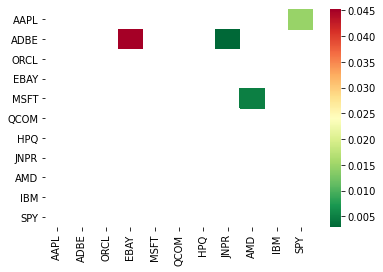

In [ ]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]

#fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [ ]:
S1 = data['ADBE']
S2 = data['MSFT']

score, pvalue, _ = coint(S1, S2)
pvalue

S1
pvalue

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")


S1

Date
2013-01-02     38.340000
2013-01-03     37.750000
2013-01-04     38.130001
2013-01-07     37.939999
2013-01-08     38.139999
                 ...    
2017-12-22    175.000000
2017-12-26    174.440002
2017-12-27    175.360001
2017-12-28    175.550003
2017-12-29    175.240005
Name: ADBE, Length: 1259, dtype: float64

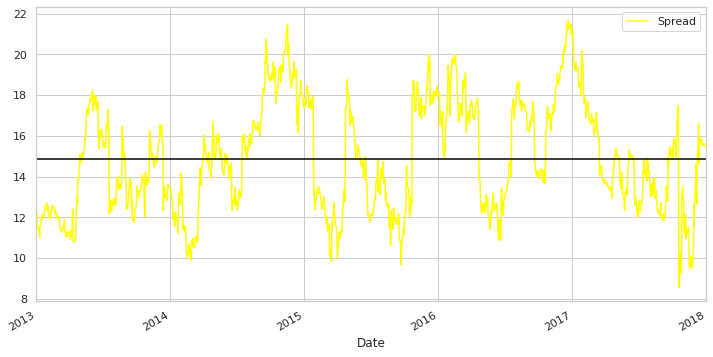

In [ ]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()

results.params

S1 = S1['ADBE']

b = results.params['ADBE']

spread = S2 - b * S1

spread.plot(figsize=(12,6),color='yellow')
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);

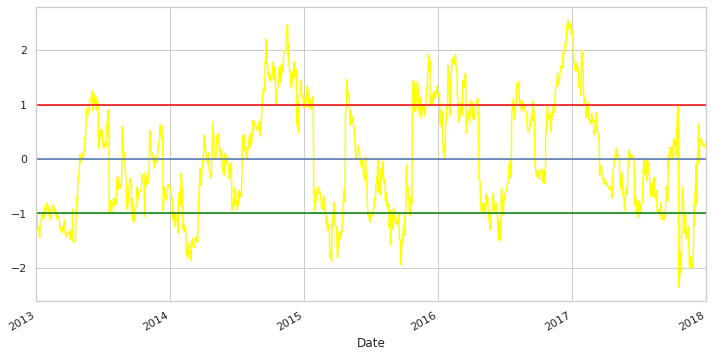

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(spread).plot(figsize=(12,6),color='yellow')
plt.axhline(zscore(spread).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.show()


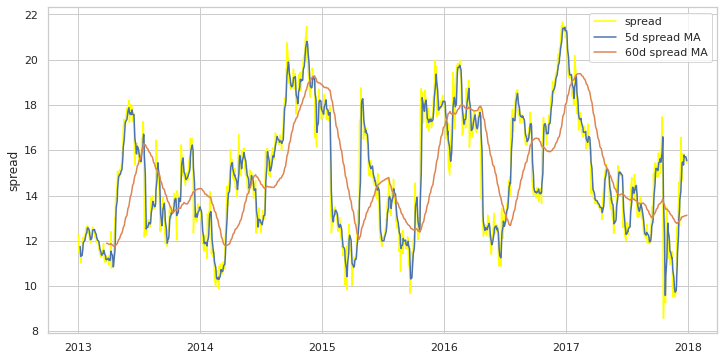

In [ ]:
spread_mavg5 = spread.rolling(window=5, center=False).mean()
spread_mavg60 = spread.rolling(window=60, center=False).mean()
std_60 = spread.rolling(window=60, center=False).std()
zscore_60_5 = (spread_mavg5 - spread_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(spread.index, spread.values, color = 'yellow')
plt.plot(spread_mavg5.index, spread_mavg5.values)
plt.plot(spread_mavg60.index, spread_mavg60.values)
plt.legend(['spread', '5d spread MA', '60d spread MA'])

plt.ylabel('spread')
plt.show()

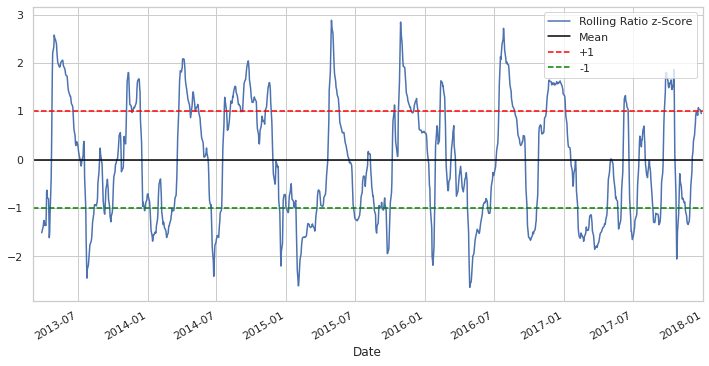

In [ ]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2013-03-05', '2018-01-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

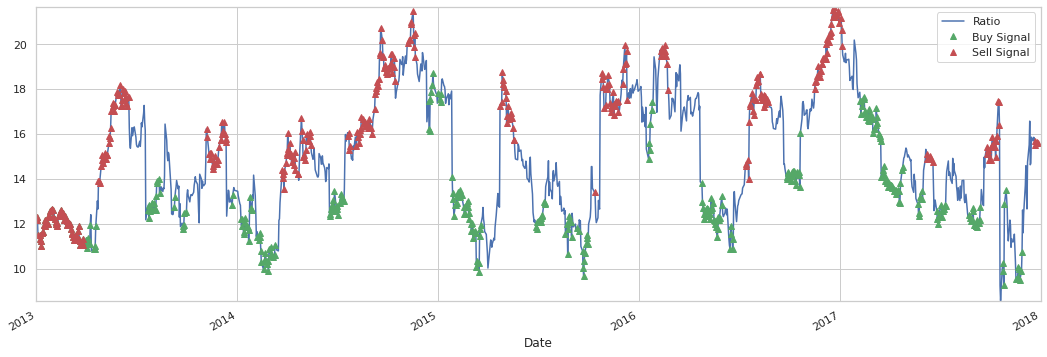

In [ ]:
plt.figure(figsize=(18,6))

spread.plot()
buy = spread.copy()
sell = spread.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, spread.min(), spread.max()))
plt.xlim('2013-01-01','2018-01-01')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

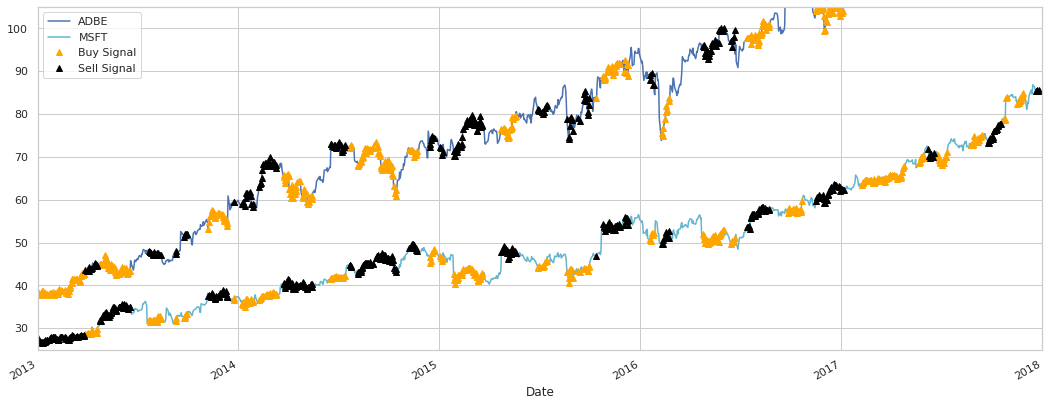

In [ ]:
plt.figure(figsize=(18,7))

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S2 and sell S1
buyR[buy!=0] = S2[buy!=0]
sellR[buy!=0] = S1[buy!=0]

# When you sell the ratio, you sell stock S2 and buy S2
buyR[sell!=0] = S1[sell!=0]
sellR[sell!=0] = S2[sell!=0]

buyR.plot(color='orange', linestyle='None', marker='^')
sellR.plot(color='black', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(25, 105)
plt.xlim('2013-01-01', '2018-01-01')

plt.legend(['ADBE', 'MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [ ]:
trade(S1, S2, 60, 5)

1561.9443458851504